Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

df1 = pd.DataFrame()
df1 = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/data/data_hw6/data_2d.csv", header=None)
df1.columns = ["class", "X", "Y"]
df2 = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/data/data_hw6/mnist.csv", header=None)
print(df1.head())
print(df2.shape)

   class         X         Y
0    0.0 -0.768716  0.460860
1    0.0  2.687848  2.366961
2    0.0 -0.201379  0.470430
3    0.0  0.608496  1.225400
4    0.0 -0.082282  1.137218
(500, 785)


In [2]:
y = df1["class"].astype(int)
X = pd.concat([df1["X"], df1["Y"]], axis = 1)

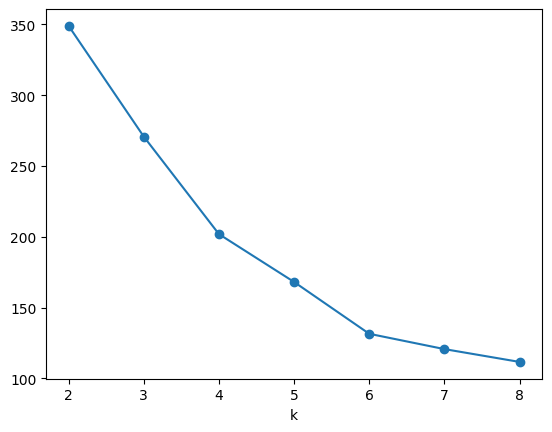

In [10]:
from sklearn.metrics import silhouette_score
SSE = []
for k in range(2,9):
  estimator = KMeans(n_clusters = k, random_state=0, n_init="auto").fit(X)
  SSE.append(estimator.inertia_)
plt.xlabel('k')
plt.plot(range(2,9),SSE,'o-')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 6, random_state=0, n_init="auto", max_iter = 1200).fit(X)
y_kmeans = kmeans.predict(X)
c = kmeans.labels_
cen = kmeans.cluster_centers_
print(cen)

[[3.25359974 4.09774241]
 [0.00496133 0.30337369]
 [0.98209515 1.68802423]
 [1.12440813 3.92863952]
 [2.61139377 2.47607712]
 [1.71799514 0.13111204]]


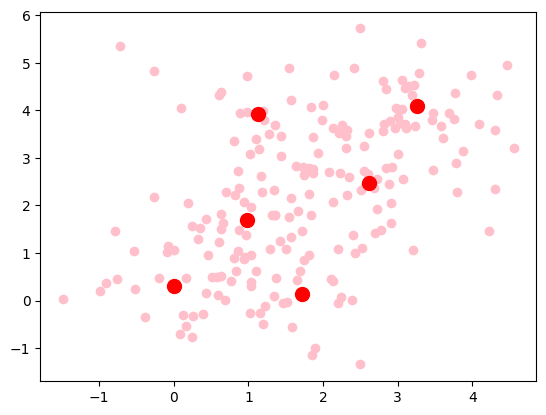

In [37]:
plt.plot(X["X"], X["Y"], marker='o' , linestyle=" ", markersize=6, color = "pink")
plt.plot(cen[:,0], cen[:,1] ,marker='o' , linestyle=" ", markersize=10, color = "red")
plt.show()

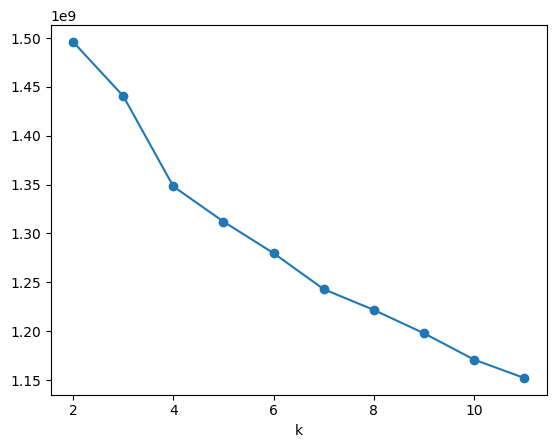

In [52]:
from sklearn.metrics import silhouette_score
# X2 = df2.drop(0, axis=1)
X2 = df2
SSE2 = []
for k in range(2,12):
  estimator2 = KMeans(n_clusters = k, random_state=0, n_init="auto").fit(X2)
  # SSE.append(silhouette_score(X2,estimator.labels_,metric='euclidean'))
  SSE2.append(estimator2.inertia_)
plt.xlabel('k')
plt.plot(range(2,12),SSE2,'o-')
plt.show()

In [53]:
#Кількість кластеів, визначена на попередньому кроці дорівнює 4
kmeans2 = KMeans(n_clusters = 4, random_state=0, n_init="auto", max_iter = 1000).fit(X2)
y_kmeans2 = kmeans2.predict(X2)
cen2 = kmeans2.cluster_centers_
print(cen2)


[[4.67460317 0.         0.         ... 0.         0.         0.        ]
 [6.34545455 0.         0.         ... 0.         0.         0.        ]
 [2.41463415 0.         0.         ... 0.         0.         0.        ]
 [2.79527559 0.         0.         ... 0.         0.         0.        ]]


Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_norm = scaler.fit_transform(X2)

pca = PCA(n_components=2)
X2_norm = pca.fit_transform(df_norm)

X2_norm_df = pd.DataFrame(X2_norm).astype(int)
# display(X2_norm)

In [55]:
cen_norm = scaler.fit_transform(cen2)

pca = PCA(n_components=2)
cen2_norm = pca.fit_transform(cen_norm)

cen2_norm_df = pd.DataFrame(cen2_norm, columns=["X", "Y"]).astype(int)
display(cen2_norm_df)

,X,Y
0,2,-2
1,-14,19
2,25,2
3,-12,-18


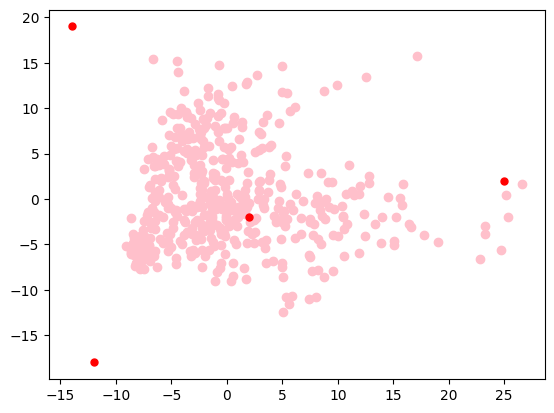

In [56]:
plt.plot(X2_norm[:,0], X2_norm[:,1], marker='o' , linestyle=" ", markersize=6, color = "pink")
plt.plot(cen2_norm_df["X"], cen2_norm_df["Y"] ,marker='o' , linestyle=" ", markersize=5, color = "red")
plt.show()

**Варіант 2**

[[ 1.79333333 -2.48      ]
 [-5.26490066 -2.93377483]
 [-1.31205674  6.41134752]
 [12.81034483 -0.93103448]]


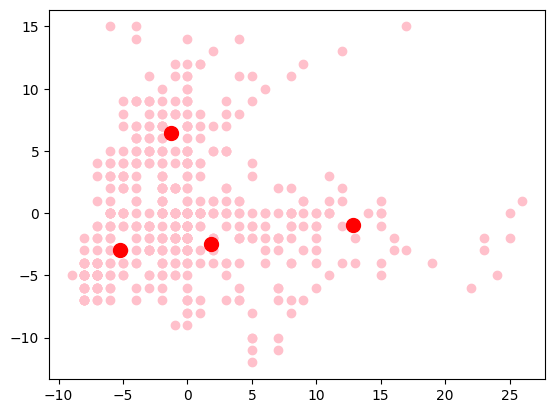

In [58]:
scaler = StandardScaler()
df_new = scaler.fit_transform(X2)

pca = PCA(n_components=2)
X2_new = pca.fit_transform(df_new)

df_new_l = pd.DataFrame(X2_new, columns=["X", "Y"]).astype(int)

kmeans3 = KMeans(n_clusters = 4, random_state=0, n_init="auto", max_iter = 400).fit(df_new_l)
y_kmeans3 = kmeans3.predict(df_new_l)

cen3 = kmeans3.cluster_centers_
print(cen3)


plt.plot(df_new_l["X"], df_new_l["Y"], marker='o' , linestyle=" ", markersize=6, color = "pink")
plt.plot(cen3[:,0], cen3[:,1] ,marker='o' , linestyle=" ", markersize=10, color = "red")
plt.show()